In [1]:
import tensorflow 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [4]:
np.shape(x_train[0])

(32, 32, 3)

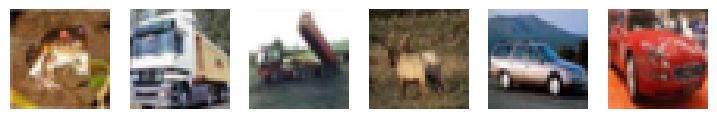

In [5]:
fig,axes=plt.subplots(1,6,figsize=(9,3))
for i,a in enumerate(axes.flat):
    a.imshow(x_train[i])
    a.axis('off')
plt.show()

In [6]:
#normalise the data
x_train=x_train/255
x_test=x_test/255

y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)

In [29]:
#create model
import tensorflow as tf

model=tensorflow.keras.Sequential()
model.add(tensorflow.keras.layers.Input(shape=np.shape(x_train[0]))),
model.add(tensorflow.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu')),
model.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(3,3))),
model.add(tensorflow.keras.layers.Flatten())
model.add(tensorflow.keras.layers.Dense(128)),
model.add(tf.keras.layers.Dense(256, activation='relu')),
model.add(tf.keras.layers.Dense(256, activation='relu')),
model.add(tensorflow.keras.layers.Dense(units=10, activation='softmax')),
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 3200)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               409728    
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                      

In [34]:
model.fit(x_train, y_train,batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 43s 53ms/step - loss: 1.4162 - accuracy: 0.4855 - val_loss: 1.1756 - val_accuracy: 0.5757
Epoch 2/10
782/782 [==============================] - 41s 53ms/step - loss: 1.0946 - accuracy: 0.6146 - val_loss: 1.0602 - val_accuracy: 0.6259
Epoch 3/10
782/782 [==============================] - 42s 53ms/step - loss: 0.9618 - accuracy: 0.6589 - val_loss: 1.0013 - val_accuracy: 0.6495
Epoch 4/10
782/782 [==============================] - 43s 55ms/step - loss: 0.8627 - accuracy: 0.6968 - val_loss: 0.9620 - val_accuracy: 0.6654
Epoch 5/10
782/782 [==============================] - 41s 53ms/step - loss: 0.7831 - accuracy: 0.7238 - val_loss: 0.9616 - val_accuracy: 0.6748
Epoch 6/10
782/782 [==============================] - 42s 54ms/step - loss: 0.7073 - accuracy: 0.7497 - val_loss: 0.9599 - val_accuracy: 0.6842
Epoch 7/10
782/782 [==============================] - 42s 54ms/step - loss: 0.6387 - accuracy: 0.7740 - val_loss: 1.0124 - val_accuracy:

In [35]:
loss,accuracy=model.evaluate(x_test,y_test)
print('Accuracy: ',accuracy*100)

313/313 [==============================] - 3s 11ms/step - loss: 1.0878 - accuracy: 0.6779
Accuracy:  67.79000163078308


In [36]:
model.save("saved_models")

INFO:tensorflow:Assets written to: saved_models\assets


INFO:tensorflow:Assets written to: saved_models\assets


In [15]:
# Quantization Aware Training

In [27]:
import tensorflow_model_optimization as tfmot
from tensorflow_model_optimization.quantization.keras import quantize_model

In [30]:
quantized_model = quantize_model(model)
quantized_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
quantized_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 quantize_layer_3 (Quantize  (None, 32, 32, 3)         3         
 Layer)                                                          
                                                                 
 quant_conv2d_3 (QuantizeWr  (None, 30, 30, 32)        963       
 apperV2)                                                        
                                                                 
 quant_max_pooling2d_2 (Qua  (None, 10, 10, 32)        1         
 ntizeWrapperV2)                                                 
                                                                 
 quant_flatten_2 (QuantizeW  (None, 3200)              1         
 rapperV2)                                                       
                                                                 
 quant_dense_8 (QuantizeWra  (None, 128)              

In [32]:
quantized_model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 78s 48ms/step - loss: 1.3981 - accuracy: 0.4949 - val_loss: 1.2332 - val_accuracy: 0.5580
Epoch 2/10
1563/1563 [==============================] - 77s 50ms/step - loss: 1.0962 - accuracy: 0.6116 - val_loss: 1.0835 - val_accuracy: 0.6152
Epoch 3/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.9704 - accuracy: 0.6598 - val_loss: 1.0511 - val_accuracy: 0.6307
Epoch 4/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8775 - accuracy: 0.6899 - val_loss: 1.0649 - val_accuracy: 0.6337
Epoch 5/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8014 - accuracy: 0.7168 - val_loss: 1.0228 - val_accuracy: 0.6585
Epoch 6/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.7187 - accuracy: 0.7476 - val_loss: 1.0897 - val_accuracy: 0.6511
Epoch 7/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.6485 - accuracy: 0.7672 - val_loss: 1.0027 -

In [33]:
loss,accuracy=quantized_model.evaluate(x_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 1.2993 - accuracy: 0.6459


In [41]:
quantized_model.save("saved_models/qat_model.h5")

C:\Users\krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
converter = tf.lite.TFLiteConverter.from_keras_model(quantized_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_qaware_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\krish\AppData\Local\Temp\tmpuedglu7a\assets


INFO:tensorflow:Assets written to: C:\Users\krish\AppData\Local\Temp\tmpuedglu7a\assets
C:\Users\krish\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\lite\python\convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


In [44]:
with open("saved_models/tflite_qaware_model.tflite", 'wb') as f:
    f.write(tflite_qaware_model)